## Using KNN for IRIS Dataset classification

In [2]:


import scipy.stats as stats
from sklearn.model_selection import cross_val_score


In [49]:
import pandas as pd
# loading the dataset
# Importing the dataset
dataset = pd.read_csv('../../../DataSet/iris.csv')

In [50]:
dataset.shape

(150, 5)

In [51]:
# Dividing data into features and labels
feature_columns = ['sepal.length', 'sepal.width', 'petal.length','petal.width']
X = dataset[feature_columns].values
y = dataset['variety'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

In [52]:
y

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [53]:
# Label encoding
# As we can see labels are categorical. KNeighborsClassifier does not accept string labels. 
# We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, 
# Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [54]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
# Spliting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [70]:
X_train.shape

(75, 4)

In [71]:
X_test.shape

(75, 4)

In [72]:
y_train.shape

(75,)

In [73]:
y_test.shape

(75,)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')

In [84]:
# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [78]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Performance Evaluation
cm = confusion_matrix(y_test, y_pred)
cm

array([[21,  0,  0],
       [ 0, 29,  1],
       [ 0,  2, 22]], dtype=int64)

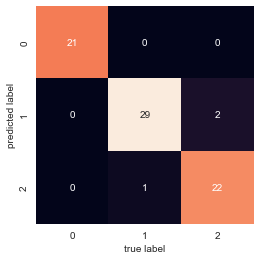

In [87]:
import seaborn as sn
import matplotlib.pyplot as plt 
sn.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [88]:
# calculate the model accuracy
from sklearn.metrics import confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
print(classification_report(y_test, y_pred))

Accuracy of our model is equal 96.0 %.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [89]:
# Using cross-validation for parameter tuning

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

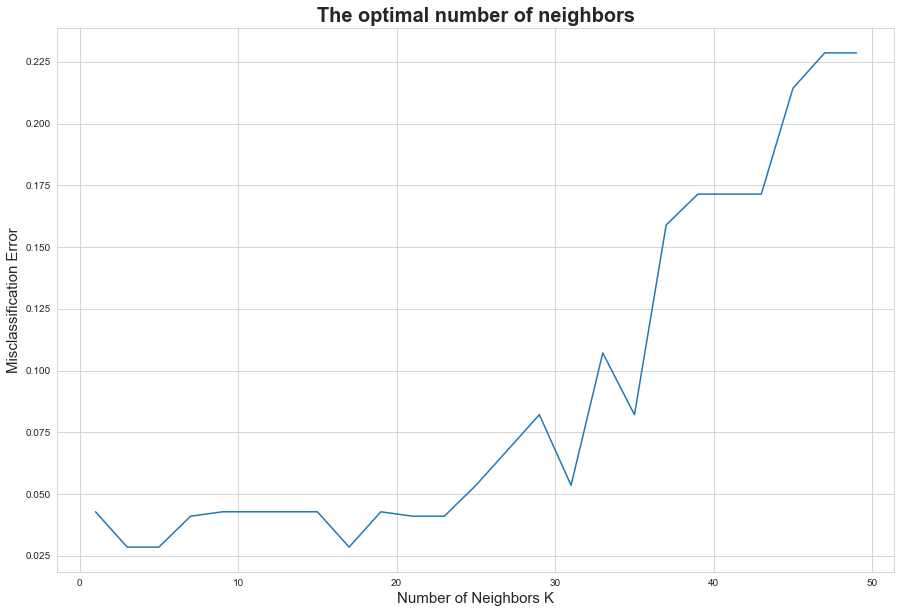

In [90]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sn.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()